<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *AIB / SECTION 4 / SPRINT 2 / NOTE 1*

# 📝 Assignment

---


# Count-based_Representation

indeed.com 에서 Data Scientist 키워드로 Job descrition을 찾아 스크래핑한 데이터를 이용해 과제를 진행해 보겠습니다.

[Data_Scienties.csv](https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv) 파일에는 1300여개의 Data Scientist job description 정보가 담겨 있습니다.

## 1. 데이터 전처리 (Text preprocessing)

In [245]:
import re
import string

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 0) 텍스트 분석에 앞서 데이터 전처리를 진행합니다.

- 파일을 불러온 후 title, company, description 에 해당하는 Column만 남겨주세요.
- 중복값을 제거하세요.

In [254]:
df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/indeed/Data_Scientist.csv')
df

,Unnamed: 0,title,company,description,url
0,0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
1,1,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,https://www.indeed.com/viewjob?jk=4e172dc068a7...
2,2,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
3,3,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,https://www.indeed.com/viewjob?jk=a06d07dec837...
4,4,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,https://www.indeed.com/viewjob?jk=422a9c487215...
...,...,...,...,...,...
1295,1295,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...,https://www.indeed.com/viewjob?jk=cf3a6989c432...
1296,1296,Senior Data Scientist,Takeda Pharmaceuticals,Job Description\nOBJECTIVES:\nEffectively work...,https://www.indeed.com/viewjob?jk=674682157fdf...
1297,1297,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,https://www.indeed.com/viewjob?jk=4e38a8dddb16...
1298,1298,Senior Data Scientist,Cox Automotive,"Cox Automotive, a subsidiary of Cox Enterprise...",https://www.indeed.com/viewjob?jk=ddef07b8b441...


In [255]:
# df.drop(['Unnamed: 0','url'], axis=1, inplace=True)
df = df[['title','company','description']]
df = df.drop_duplicates(ignore_index = True)

print(df.shape)
df

(757, 3)


,title,company,description
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...
1,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...
2,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...
4,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell..."
...,...,...,...
752,Senior Data Analyst,Intuit,Our Expert Delivery & Business Intelligence te...
753,"Senior / Data Scientist, Advertising Business",Spotify,"Music for everyone, no credit card needed. It’..."
754,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...
755,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...


### 1) 토큰을 정제합니다.

- 문자를 소문자로 통일
- 분석에 관련 없는 정보 제거
- 이번 과제는 `spacy` 로부터 `"en_core_web_sm"` 을 로드하여 진행해주세요.

- **문항 1) 대문자를 소문자로 변경하는 함수를 입력하세요.**
- **문항 2) 정규 표현식을 사용하여 re 라이브러리에서 알파벳 소문자, 숫자만 받을 수 있는 코드를 작성하세요.**

In [256]:
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)

def tokenize1(text):
  tokens = []
  for doc in tokenizer.pipe(text):
      doc_tokens = [re.sub(r"[^a-z0-9]", "", token.text.lower()) for token in doc]
  #re.sub: 문자열 치환, r:raw string, 문자열 그대로, ^기호:not,제외하고
  #영소문자,숫자를 제외하고 나머지를 모두 공백으로 바꿈
      tokens.append(doc_tokens)
  return tokens

In [257]:
df['tokens1'] = tokenize1(df['description'])
df.tail()

,title,company,description,tokens1
752,Senior Data Analyst,Intuit,Our Expert Delivery & Business Intelligence te...,"[our, expert, delivery, , business, intelligen..."
753,"Senior / Data Scientist, Advertising Business",Spotify,"Music for everyone, no credit card needed. It’...","[music, for, everyone, no, credit, card, neede..."
754,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...,"[senior, data, , applied, scientist, , do, you..."
755,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,"[ebay, is, a, global, commerce, leader, that, ..."
756,Senior Data Scientist,Spring Discovery,tl;dr\nSpring is accelerating the discovery of...,"[tldr, , spring, is, accelerating, the, discov..."


### 2) 정제한 토큰을 시각화 합니다.

- Top 10 토큰을 프린트 합니다.
- 토큰의 수, 빈도 순위, 존재 문서 수, 비율 등 정보를 계산합니다.
- 토큰 순위에 따른 퍼센트 누적 분포 그래프를 시각화합니다.

- **문항 3) 추천 토큰 순위 10개 단어를 입력하세요.**

In [259]:
#top10
from collections import Counter
word_counts = Counter()

df['tokens1'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('and', 21864),
 ('', 21493),
 ('to', 12694),
 ('the', 10538),
 ('of', 8839),
 ('data', 7425),
 ('in', 6769),
 ('a', 6436),
 ('with', 5727),
 ('for', 4132)]

In [260]:
#토큰정보
def word_count(docs):
  """토큰화된 문서를 입력받아 토큰정보를 가진 데이터프레임으로 리턴합니다.
  Args:
    docs(series or list): 토큰화된 문서가 들어있는 list
  Returns:
    list: Dataframe
  """
  # 전체 코퍼스에서 단어 빈도 카운트
  word_counts = Counter()

  # 단어가 존재하는 문서의 빈도 카운트, 단어가 한 번 이상 존재하면 +1
  word_in_docs = Counter()

  # 전체 문서의 갯수
  total_docs = len(docs)

  for doc in docs:
    # update: 개수를 바꾸는 것이 아닌 추가
    word_counts.update(doc)
    word_in_docs.update(set(doc))
  # 임시 데이터프레임 생성
  temp = zip(word_counts.keys(), word_counts.values())
  wc = pd.DataFrame(temp, columns = ['word', 'count'])

  # 단어의 순위
  # method='first': 같은 값의 경우 먼저나온 요소를 우선
  wc['rank'] = wc['count'].rank(method='first', ascending=False)
  total = wc['count'].sum()

  # 코퍼스 내 단어의 비율
  wc['percent'] = wc['count'].apply(lambda x: x / total)
  wc = wc.sort_values(by='rank')

  # 누적 비율
  # cumsum() : cumulative sum
  wc['cul_percent'] = wc['percent'].cumsum()

  temp2 = zip(word_in_docs.keys(), word_in_docs.values())
  ac = pd.DataFrame(temp2, columns=['word', 'word_in_docs'])
  wc = ac.merge(wc, on='word')
    
  # 전체 문서 중 존재하는 비율
  wc['word_in_docs_percent'] = wc['word_in_docs'].apply(lambda x: x / total_docs)
  # 순위대로 정렬해서 반환
  return wc.sort_values(by='rank')

In [261]:
wc = word_count(df['tokens1'])
wc.head(11)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
126,and,755,21864,1.0,0.053487,0.053487,0.997358
0,,751,21493,2.0,0.052580,0.106067,0.992074
103,to,754,12694,3.0,0.031054,0.137121,0.996037
182,the,745,10538,4.0,0.025780,0.162901,0.984148
134,of,745,8839,5.0,0.021623,0.184524,0.984148
5,data,740,7425,6.0,0.018164,0.202689,0.977543
92,in,748,6769,7.0,0.016559,0.219248,0.988111
28,a,739,6436,8.0,0.015745,0.234993,0.976222
116,with,742,5727,9.0,0.014010,0.249003,0.980185
320,for,727,4132,10.0,0.010108,0.259111,0.960370


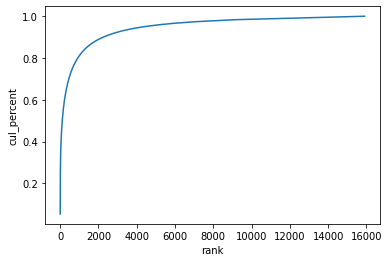

In [262]:
# 단어의 누적 분포 그래프 시각화
import seaborn as sns

sns.lineplot(x='rank', y='cul_percent', data=wc);

In [164]:
!pip install squarify

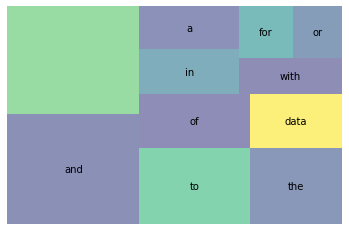

In [263]:
import squarify
import matplotlib.pyplot as plt
wc_top10 = wc[wc['rank'] <= 11]
squarify.plot(sizes=wc_top10['percent'], label=wc_top10['word'], alpha=0.6)
plt.axis('off')
plt.show()

### 4) 확장된 불용어 사전을 사용해 토큰을 정제합니다.


- **문항 4) 기본 불용어 사전에 두 단어(`"data", "work"`)를 추가하는 코드를 사용해주세요.**
- **문항 5) 불용어를 제거하고 난 뒤 토큰 순위 10개의 단어를 입력하세요.**

In [264]:
#nlp.Defaults.stop_words
#nlp = spacy.load("en_core_web_sm")
#spacy에서 기본적으로 제공하는 불용어사전, 타입은 set
STOP_WORDS = nlp.Defaults.stop_words.union(["data", "work"])
def tokenize2(text):
  tokens = []
  # 토큰에서 불용어 제거, 소문자화 하여 업데이트
  for doc in tokenizer.pipe(text):
    doc_tokens = []
    for token in doc:
      # 토큰이 불용어, 구두점, 공백이 아니면 저장
      if (token.is_stop == False) & (token.is_punct == False)& (token.is_space==False):
        if token.text.lower() not in STOP_WORDS:
          doc_tokens.append(re.sub(r"[^a-z0-9]", "", token.text.lower()))

    tokens.append(doc_tokens)
  return tokens

In [265]:
df['tokens2'] = tokenize2(df['description'])
df

,title,company,description,tokens1,tokens2
0,Data Scientist (Structured Products),EquiTrust Life Insurance Company,Job Details\nDescription\nEssential Duties and...,"[job, details, , description, , essential, dut...","[job, details, description, essential, duties,..."
1,"Specialist, Data Science",Nationwide,As a team member in the Finance and Internal A...,"[as, a, team, member, in, the, finance, and, i...","[team, member, finance, internal, audit, depar..."
2,Sr. Data Scientist (Remote),American Credit Acceptance,Overview:\nAmerican Credit Acceptance seeks a ...,"[overview, , american, credit, acceptance, see...","[overview, american, credit, acceptance, seeks..."
3,Data Scientist Associate Sr (DADS06) BTB - LEG...,"JPMorgan Chase Bank, N.A.",J.P. Morgan's Corporate & Investment Bank (CIB...,"[jp, morgans, corporate, , investment, bank, c...","[jp, morgans, corporate, investment, bank, cib..."
4,Data Scientist,VyStar Credit Union,"At VyStar, we offer competitive pay, an excell...","[at, vystar, we, offer, competitive, pay, an, ...","[vystar, offer, competitive, pay, excellent, b..."
...,...,...,...,...,...
752,Senior Data Analyst,Intuit,Our Expert Delivery & Business Intelligence te...,"[our, expert, delivery, , business, intelligen...","[expert, delivery, business, intelligence, tea..."
753,"Senior / Data Scientist, Advertising Business",Spotify,"Music for everyone, no credit card needed. It’...","[music, for, everyone, no, credit, card, neede...","[music, everyone, credit, card, needed, its, p..."
754,Senior Data & Applied Scientist,Microsoft,Senior Data & Applied Scientist\nDo you have a...,"[senior, data, , applied, scientist, , do, you...","[senior, applied, scientist, passion, machine,..."
755,Senior Data Scientist,eBay Inc.,eBay is a global commerce leader that allows y...,"[ebay, is, a, global, commerce, leader, that, ...","[ebay, global, commerce, leader, allows, shape..."


In [266]:
wc = word_count(df['tokens2'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
112,experience,705,3450,1.0,0.014191,0.014191,0.931308
513,business,536,2064,2.0,0.008490,0.022681,0.708058
39,science,611,1648,3.0,0.006779,0.029459,0.807133
183,team,588,1625,4.0,0.006684,0.036143,0.776750
288,learning,526,1596,5.0,0.006565,0.042708,0.694848
193,analysis,516,1349,6.0,0.005549,0.048257,0.681638
201,skills,547,1251,7.0,0.005146,0.053402,0.722589
207,machine,470,1152,8.0,0.004738,0.058141,0.620872
321,analytics,428,1136,9.0,0.004673,0.062814,0.565390
31,models,459,1034,10.0,0.004253,0.067067,0.606341


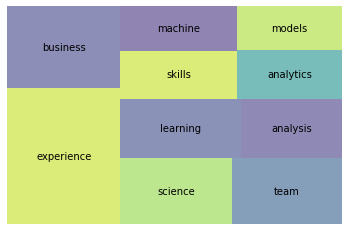

In [267]:
import squarify
import matplotlib.pyplot as plt
wc_top10 = wc[wc['rank'] <= 10]
squarify.plot(sizes=wc_top10['percent'], label=wc_top10['word'], alpha=0.6)
plt.axis('off')
plt.show()

### 5) Lemmatization 사용 효과를 분석해 봅니다.



- **문항 6) Lemmatization을 진행한 뒤 상위 10개 단어를 입력하세요.**

In [286]:
STOP_WORDS = nlp.Defaults.stop_words.union(["data", "work"])
def tokenize3(text):
  tokens = []
  for doc in tokenizer.pipe(text):
    doc_tokens = []
    for token in doc:
      if (token.is_stop == False) & (token.is_punct == False) & (token.is_space==False) & (token.pos_ != 'PRON'):
        if token.text.lower() not in STOP_WORDS:
          doc_tokens.append(re.sub(r"[^a-z0-9]", "", token.lemma_.lower()))

    tokens.append(doc_tokens)
  return tokens

In [287]:
df['tokens3'] = tokenize3(df['description'])

wc = word_count(df['tokens3'])
wc.head(10)

,word,word_in_docs,count,rank,percent,cul_percent,word_in_docs_percent
115,experience,707,3604,1.0,0.014824,0.014824,0.933950
188,team,630,2125,2.0,0.008741,0.023565,0.832232
517,business,540,2115,3.0,0.008700,0.032264,0.713342
45,science,612,1672,4.0,0.006877,0.039142,0.808454
200,analysis,537,1532,5.0,0.006302,0.045443,0.709379
253,model,508,1454,6.0,0.005981,0.051424,0.671070
50,learn,507,1248,7.0,0.005133,0.056557,0.669749
215,machine,470,1155,8.0,0.004751,0.061308,0.620872
328,analytics,428,1136,9.0,0.004673,0.065981,0.565390
113,product,410,1112,10.0,0.004574,0.070555,0.541612


## 2. 유사한 문서 찾기

### 1) `TfidfVectorizer`를 이용해 각 문서들을 벡터화 한 후 KNN 모델을 만들고, <br/> 내가 원하는 `job description`을 질의해 가장 가까운 검색 결과들을 가져오고 분석합니다.

- **문항 9) 88번 index의 `job description`와 5개의 가장 유사한 `job description`이 있는 index를 입력하세요.**
    - 답은 88번 인덱스를 포함합니다.
    - `max_features = 3000` 으로 설정합니다.
    - [88, 90, 91, 93, 94] 형태로 답을 입력해주세요

In [289]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english',max_features=3000)
dtm_tfidf = tfidf.fit_transform(df['description'])

dtm_tfidf = pd.DataFrame(dtm_tfidf.todense(), columns=tfidf.get_feature_names())
dtm_tfidf

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,10,100,11,12,14,15,18,19,20,200,2017,2018,2019,2020,22,24,25,30,300,31,35,3m,40,400,401,401k,50,500,5000,60,600,75,80,90,aa,ab,abilities,ability,...,wellness,whip,wholly,wi,wide,widely,wildlife,willing,willingness,winning,women,word,work,workday,worked,worker,workers,workflow,workflows,workforce,working,workplace,workplaces,works,world,worldwide,wrangling,wri,write,writing,written,www,year,years,yelp,yes,york,yrs,zillow,zulily
0,0.0,0.000000,0.05272,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.058637,0.052353,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.069356,0.0,0.0,0.000000,0.062315,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.051677,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.023379,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.072438,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.031375,0.027418,0.0,0.0,0.000000,0.098541,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.071503,0.000000,0.0,0.000000,0.012252,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.018485,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.056214,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.058743,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.062152,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.058510,0.000000,0.000000,0.017488,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.033337,0.00000,0.035082,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.042929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.043708,...,0.000000,0.0,0.0,0.0,0.053924,0.000000,0.0,0.000000,0.038602,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.038116,0.000000,0.000000,0.0,0.030795,0.103499,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.060084,0.013012,0.0,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.027691,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030387,0.0,0.0,0.0,0.0,0.0,0.0,0.030644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023711,0.010585,...,0.000000,0.0,0.0,0.0,0.019588,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.028417,0.067195,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.020896,0.000000,0.0,0.044746,0.000000,0.000000,0.0,0.0,0.0,0.021826,0.000000,0.000000,0.000000,0.047268,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0
753,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.020719,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.082207,0.0,0.065596,0.0,0.0,0.0,0.0,0.000000,0.000000,0.046606,0.0,0.000000,0.098124,0.05

In [290]:
from sklearn.neighbors import NearestNeighbors

# dtm을 사용해 NN 모델을 학습
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm_tfidf)

NearestNeighbors(algorithm='kd_tree')

In [291]:
nn.kneighbors([dtm_tfidf.iloc[88]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  "X does not have valid feature names, but"


(array([[0.        , 1.1283426 , 1.18893646, 1.19442548, 1.19937307]]),
 array([[ 88,  40, 121,  68, 680]]))

## 3. TF-IDF 이용한 텍스트 분류 진행하기

TF-IDF를 이용해 문장 혹은 문서를 벡터화한 경우, 이 벡터값을 이용해 문서 분류 태스크를 진행할 수 있습니다. 

현재 다루고 있는 데이터셋에는 label이 존재하지 않으므로, title 컬럼에 "Senior"가 있는지 없는지 여부를 통해 Senior 직무 여부를 분류하는 작업을 진행해보겠습니다.

### 1) title 컬럼에 "Senior" 문자열이 있으면 1, 없으면 0인 "Senior"라는 새로운 컬럼을 생성해주세요.

문항 7) 새롭게 만든 Senior 컬럼에서 값이 1인 (Senior O) 데이터의 개수는?

In [292]:
df['Senior'] = df['title'].apply(lambda x:1 if 'Senior' in x else 0)
df['Senior'].value_counts()

0    662
1     95
Name: Senior, dtype: int64

문항 8) sklearn의 `train_test_split`을 통해 train 데이터와 valid 데이터로 나눈 후, `sklearn`의 `DecisionTreeClassifier`를 이용해 분류를 진행해주세요. 

단, x값은 위에서 학습한 dtm_tfidf를 그대로 이용해주세요. train_test_split과 DecisionTreeClassifier의 random_state을 42로 고정하고, test_size는 0.1로 설정해주세요.

학습을 완료한 후, test 데이터에 대한 예측을 진행하고 label 1에 대한 precision과 recall 값을 적어주세요

In [293]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(
    dtm_tfidf, df['Senior'], test_size=0.10, stratify=df['Senior'], random_state=42)

In [294]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [295]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

In [296]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        66
           1       0.15      0.20      0.17        10

    accuracy                           0.75        76
   macro avg       0.51      0.52      0.51        76
weighted avg       0.78      0.75      0.76        76

